# SVC on MNIST Dataset

In [1]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix

import matplotlib.pyplot as plt
import seaborn as sns

from keras.datasets import mnist

from sklearn.preprocessing import OrdinalEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay, classification_report, plot_roc_curve, roc_auc_score

(60000, 28, 28) (10000, 28, 28) (60000,) (10000,)


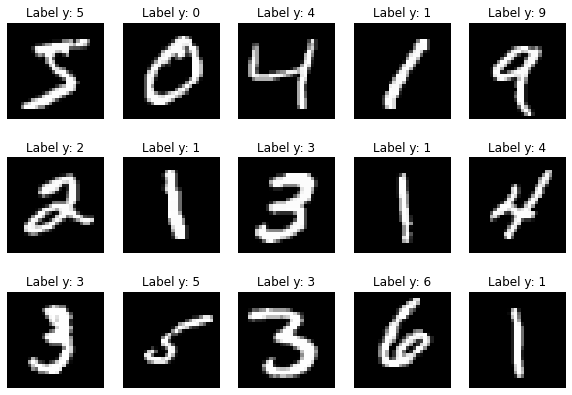

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

fig = plt.figure(figsize=(10, 7))
for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1)
    ax.imshow(X_train[i], cmap=plt.get_cmap('gray'))
    ax.set_title(f'Label y: {y_train[i]}')
    plt.axis('off')

**Data Preprocessing**

In [3]:
X_train = X_train.reshape(X_train.shape[0], 28 * 28)
X_test = X_test.reshape(X_test.shape[0], 28 * 28)

# Normalizing
X_train = X_train/255
X_test = X_test/255

print(X_train.shape, X_test.shape)

X_train = X_train[:10000, :]  # Consider the first 10K images in train
X_test = X_test[:2000, :]  # Consider the first 2K images in train
y_train = y_train[:10000]
y_test = y_test[:2000]

print(X_train.shape, X_test.shape)

(60000, 784) (10000, 784)
(10000, 784) (2000, 784)


## Multi-Class Classification for MNIST Using  Linear SVM

In [5]:
pipe1 = Pipeline([
    ('scaler', MinMaxScaler()),
    ('classifier', SVC(kernel="linear", C=1))
])

pipe1.fit(X_train, y_train)

acc = cross_val_score(pipe1, X_train, y_train, cv=2)
print(f'Training accuracy: {acc.mean() * 100: .2f} %')

Training accuracy:  91.07 %


Text(0.5, 1.0, 'Confusion Matrix')

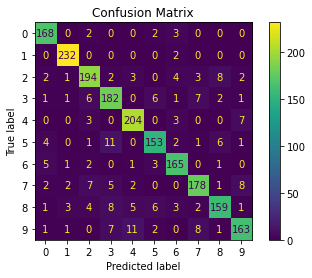

In [6]:
y_pred = pipe1.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

plt.title('Confusion Matrix')

In [7]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.96      0.94       175
           1       0.96      0.99      0.98       234
           2       0.89      0.89      0.89       219
           3       0.85      0.88      0.86       207
           4       0.90      0.94      0.92       217
           5       0.89      0.85      0.87       179
           6       0.90      0.93      0.91       178
           7       0.89      0.87      0.88       205
           8       0.89      0.83      0.86       192
           9       0.89      0.84      0.86       194

    accuracy                           0.90      2000
   macro avg       0.90      0.90      0.90      2000
weighted avg       0.90      0.90      0.90      2000



## MNIST Multi-Class Classification Using Non-linear SVM

In [9]:
pipe2 = Pipeline([('scaler', MinMaxScaler()), 
                   ('classifier', SVC(kernel='rbf', gamma=0.1, C=1))])
pipe2.fit(X_train, y_train)

acc = cross_val_score(pipe2, X_train, y_train, cv=2)
print(f'Training accuracy: {acc.mean() * 100: .2f} %')

Training accuracy:  82.87 %


Text(0.5, 1.0, 'Confusion Matrix')

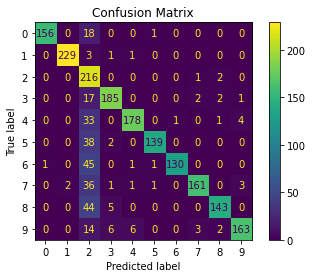

In [10]:
y_pred = pipe2.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

plt.title('Confusion Matrix')

In [11]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.89      0.94       175
           1       0.99      0.98      0.98       234
           2       0.47      0.99      0.63       219
           3       0.93      0.89      0.91       207
           4       0.95      0.82      0.88       217
           5       0.98      0.78      0.87       179
           6       0.99      0.73      0.84       178
           7       0.96      0.79      0.87       205
           8       0.95      0.74      0.84       192
           9       0.95      0.84      0.89       194

    accuracy                           0.85      2000
   macro avg       0.92      0.84      0.86      2000
weighted avg       0.91      0.85      0.86      2000



## Using GridSearchCV

**Why we use log space in hyper-parameter tuning for SVMs ?**
- We are using values in logspace because logarithmic scale enables us to **search a bigger space quickly**. 
- Another reason is for **"regularization" parameters, such as C in svm. It is not too sensitive.** In other words, we may not find too much difference with 10 or 15, or 20, but results would be very different from 10 to 1000. That is why we start with log search.

In [ ]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)

param_grid = dict(gamma=gamma_range, C=C_range)

cv = StratifiedShuffleSplit(n_splits=3, test_size=0.2, random_state=42)

grid = GridSearchCV(SVC(kernel='rbf'), param_grid=param_grid, cv=cv)
grid.fit(X_train, y_train)

print(grid.best_params_, grid_best_score_)

**NOTE :** `gamma` controls the size of the radial basis function